In [9]:
!pip install scikit-learn osmnx pandas matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt



In [11]:
G = ox.graph.graph_from_place(
    "belo horizonte - MG", 
    network_type="walk",
    custom_filter='["highway"~"primary|secondary|tertiary"]'
)
place = "Belo Horizonte, Minas Gerais, Brazil" # não utilizado

In [12]:
# Associa os museus aos nós do grafo
features = ox.features.features_from_place(place, {"tourism": "museum"})
feature_points = features.representative_point()
nn = ox.distance.nearest_nodes(G, feature_points.x, feature_points.y)

useful_tags = ["name", "fee"]  # Ajuste com base nas colunas disponíveis
for node, feature in zip(nn, features[useful_tags].to_dict(orient="records")):
    feature = {k: v for k, v in feature.items() if pd.notna(v)}
    G.nodes[node].update({"museum": feature})

In [13]:
print(features.columns)

Index(['geometry', 'addr:city', 'addr:street', 'addr:suburb',
       'contact:facebook', 'contact:instagram', 'contact:phone',
       'contact:twitter', 'contact:website', 'contact:youtube', 'museum',
       'name', 'opening_hours', 'tourism', 'addr:housenumber', 'fee',
       'alt_name', 'contact:email', 'name:pt', 'addr:postcode', 'building',
       'historic', 'phone', 'source', 'toilets:wheelchair', 'website',
       'wheelchair', 'wikidata', 'wikimedia_commons', 'wikipedia',
       'internet_access', 'layer', 'addr:housename', 'loc_name', 'operator',
       'operator:type', 'start_date', 'email', 'toilets', 'type'],
      dtype='object')


In [14]:
print("Number of museum nodes:", len([n for n, d in G.nodes(data=True) if "museum" in d]))

Number of museum nodes: 14


In [15]:
# Verifica se os museus foram associados corretamente
print(f"Quantidade de nós no grafo: {len(G.nodes)}")
print(f"Quantidade de nós com museus: {len([n for n, d in G.nodes(data=True) if 'museum' in d])}")

Quantidade de nós no grafo: 3834
Quantidade de nós com museus: 14


(<Figure size 800x800 with 1 Axes>, <Axes: >)

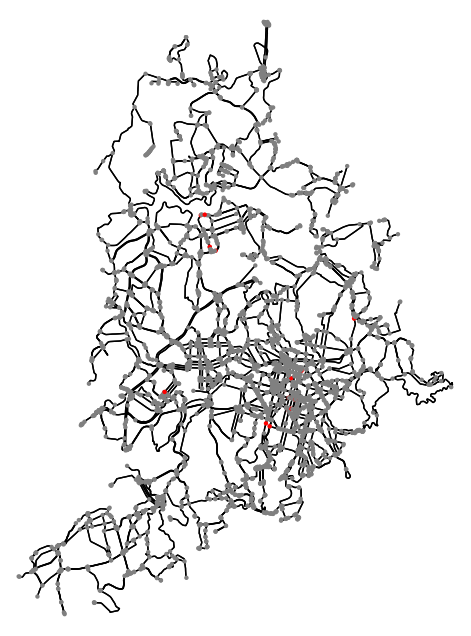

In [16]:
# Identifica os nós que possuem a chave "museum"
museum_nodes = [n for n, d in G.nodes(data=True) if "museum" in d]

# Define as cores dos nós: vermelho para nós com "museum", cinza para os demais
node_colors = ["r" if n in museum_nodes else "gray" for n in G.nodes]

# Plota o grafo com as cores ajustadas
ox.plot_graph(G, node_color=node_colors, node_size=10, edge_color="k", bgcolor="w", show=False)